# Polinomial

<Axes: >

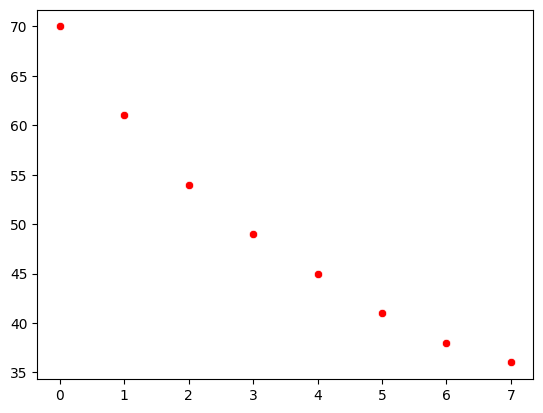

In [2]:
import numpy as np
import seaborn as sns

# Lista de dados de X
x_list = [0,1,2,3,4,5,6,7]
# Lista de dados de Y
y_list = [70,61,54,49,45,41,38,36]
# Grau desejado do polinomio
degree = 2

# Criando um gráfico com os pontos que serão utilizados
sns.scatterplot(x=x_list, y=y_list, color="r")

## Funções Utilizadas para montar a função polinomial

In [ ]:
# Cria um elemento da Matriz A
# A matriz A faz parte do sistema de equações normais usado para encontrar os coeficientes de um polinômio
# que melhor ajusta um conjunto de pontos no método dos mínimos quadrados.
def elem_a(j, i, x):
    sum_x = 0
    # Percorre todos os valores de X
    for xi in x:
        # Soma os valores de X elevados a (i + j), que correspondem às somas de potências necessárias na matriz A
        sum_x += xi**(j+i)
    # retorna o valor correspondente ao valor Xij da matriz A
    return sum_x

# Cria a Matriz A
# A matriz A tem dimensão (n+1) x (n+1) e contém somas de potências de x.
def calculate_a_matrix(n, x):
    # Objeto que representa a Matriz A
    matrix = []
    # Percorre as linhas da matriz A
    for j in range(n+1):  
        # "Array" que representa uma linha na matriz A
        row = []
        # Percorre as colunas da matriz A
        for i in range(n+1):  
            # Calcula o elemento da matriz A
            xij = elem_a(j, i, x)  
            # Coloca o elemento na linha
            row.append(xij)
        # Coloca a linha na Matriz A
        matrix.append(row)
    return matrix

# Cria um elemento da Matriz B
# A matriz B representa o vetor de termos independentes no sistema de equações normais.
def elem_b(j, x, y):
    sum_y = 0
    # Percorre todos os valores de X e Y
    for iterator in range(len(x)):
        # Cada elemento de B é a soma dos produtos de y pelos valores de x elevados a j
        sum_y += y[iterator] * x[iterator]**(j)
    return sum_y

# Cria a Matriz B
# A matriz B tem dimensão (n+1) x 1 e contém somas de produtos de x^j com y.
def calculate_b_matrix(n, x, y):
    matrix = []
    # Percorre as linhas da matriz B
    for j in range(n+1):  
        # Calcula o elemento da matriz B
        yij = elem_b(j, x, y)  
        # Adiciona o elemento na Matriz B
        matrix.append([yij])
    return matrix


# Calculo para fazer a Função polinomial

In [4]:
# Calcula a Matriz A
matrix_a = np.asmatrix(calculate_a_matrix(degree, x_list))
# Calcula a Matriz B
matrix_b = np.asmatrix(calculate_b_matrix(degree, x_list, y_list))

# Calcula a solução do sistema
system_solution = np.linalg.inv(matrix_a).dot(matrix_b)

print("Matriz A:\n")
print(matrix_a)
print("\nMatriz B:\n")
print(matrix_b)
print("\nSolução do sistema:\n")
print(system_solution)

Matriz A:

[[   8   28  140]
 [  28  140  784]
 [ 140  784 4676]]

Matriz B:

[[ 394]
 [1181]
 [5595]]

Solução do sistema:

[[69.33333333]
 [-8.29761905]
 [ 0.51190476]]


## Descobrindo um valor de Y com base em um Valor de X indicado

In [ ]:
x = int(input("Valor de X que se deseja calcular: "))

y = 0
# Passa por todos os coeficientes do polinomio
for i in range(len(system_solution)):
    # faz o somatório dos coeficientes
    y += system_solution[i,0] * (x ** i)

print(f"O valor de Y para X = {x} é: {y:.3f}")

O valor de Y para X = 5 é: 40.643


# Geração de um gráfico com um intervalo de dados

R²: 99.79 %


<Axes: >

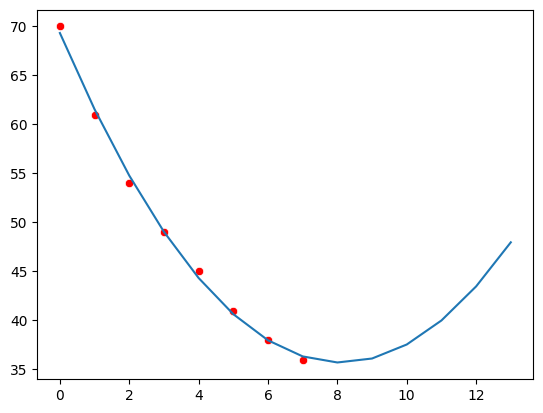

In [ ]:
# Gera uma lista de X do 0 até o maior numero da lista * 2, com espaçamento de 1 em 1
generated_x_list = range(0, max(x_list) * 2, 1)
# Lista dos valores previstos para Y
predicted_y = []
for xi in generated_x_list:
    # Somatório do polinomio
    y = 0
    for i in range(len(system_solution)):
        y += system_solution[i,0] * (xi ** i)
    predicted_y.append(y)

# Média dos valores de Y
y_mean = np.mean(y_list)
# SQT ou Soma dos Quadrados Totais
sqt = np.sum((np.array(y_list) - y_mean) ** 2)
# SQE ou Soma dos Quadrados do Erro
sqe = np.sum((np.array(y_list) - np.array(predicted_y[0:max(x_list) + 1])) ** 2)
# R²
r_squared = 1 - (sqe / sqt)
print(f"R²: {r_squared * 100:.2f} %")

sns.scatterplot(x=x_list, y=y_list, color="r")
sns.lineplot(x=generated_x_list, y=predicted_y)